## Importing dependecies

In [1]:
#importing dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Loading data

In [2]:
#loading data

df= pd.read_csv('dataforml.csv')
df.head()

df['Reason'].value_counts() #dataset imbalanced
#df['Gender'].value_counts()




Unhealthy    432
Healthy       77
Name: Reason, dtype: int64

## One-hot encoding

In [3]:
#data processing
df = pd.get_dummies(df,columns = ['Gender']) #categorical data converted to numerical
#df.head()

## Splitting Datasets

In [4]:
#splitting target and features

X = df.drop(columns=["Reason","Fileno"],axis=1)
Y = df["Reason"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100)


# Selection of Features

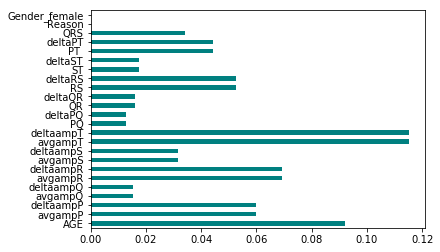

In [5]:
#using information gain method
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X,Y)
feat_importances = pd.Series(importances,df.columns[1:len(df.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

## Logistic Regression

In [6]:
#logisticregression
#model= LogisticRegression(max_iter=3000)
#model.fit(X_train, Y_train)

## Decision Tree

In [7]:
#model= DecisionTreeClassifier() 
#model.fit(X_train, Y_train)

## Random Forest

In [8]:
model= RandomForestClassifier()
model.fit(X_train, Y_train)


RandomForestClassifier()

## Naive Bayes

In [9]:
#model= GaussianNB()
#model.fit(X_train, Y_train)


## Pipeline : Cross Validation + Handle imbalanced data

In [10]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# define dataset
X, Y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# define pipeline
steps = [('over', ADASYN()),('model', model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
score =  mean((scores))


print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.910


## Cross Validation

In [11]:
#accuracy=[]
#skf= StratifiedKFold(n_splits=10,random_state=None)
#skf.get_n_splits(X,Y)
#
##accuracy list of splits
#for train_index, test_index in skf.split(X,Y):
#    print("Train\n", train_index, "\nValidation\n", test_index)
#    X1_train,X1_test=X.iloc[train_index],X.iloc[test_index]
#    Y1_train,Y1_test=Y.iloc[train_index],Y.iloc[test_index]
#    
#                            
#    model.fit(X_train, Y_train)
#    prediction=model.predict(X_test)
#    score=accuracy_score(prediction,Y_test)
#    accuracy.append(score)
#                            
#np.array(accuracy).mean()

## Handling Imbalanced Data : ADASYN

In [12]:
#oversample = ADASYN()
#X_train, Y_train = oversample.fit_resample(X, Y)
#
#Y_train.value_counts()
#

## Model Evaluation

In [13]:
#confusion matrix
model.fit(X_train, Y_train)
prediction=model.predict(X_test)
print(df['Reason'].value_counts())

print(confusion_matrix(prediction, Y_test))

print(classification_report(Y_test,prediction))

#accuracy score

accuracy = accuracy_score(Y_test, prediction)
print("accuracy of GAUSSIAN NAIVE BAYES : ",accuracy) 


Unhealthy    432
Healthy       77
Name: Reason, dtype: int64
[[ 9  3]
 [ 5 85]]
              precision    recall  f1-score   support

     Healthy       0.75      0.64      0.69        14
   Unhealthy       0.94      0.97      0.96        88

    accuracy                           0.92       102
   macro avg       0.85      0.80      0.82       102
weighted avg       0.92      0.92      0.92       102

accuracy of GAUSSIAN NAIVE BAYES :  0.9215686274509803


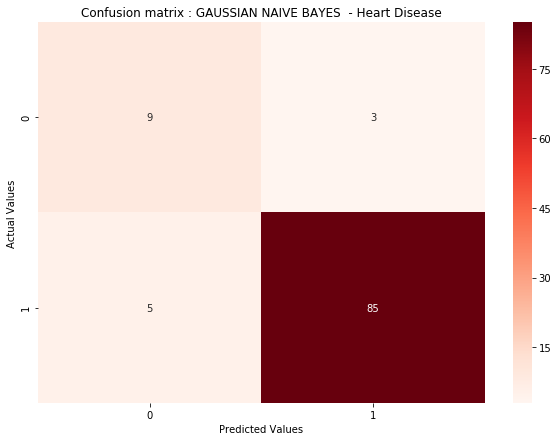

In [14]:
cm= confusion_matrix(prediction, Y_test)
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix : GAUSSIAN NAIVE BAYES  - Heart Disease')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


In [15]:
#TRAIN
#from sklearn.metrics import classification_report
#X_train_prediction = model.predict(X_train)
#training_accuracy = accuracy_score(X_train_prediction, Y_train)
#print(confusion_matrix(X_train_prediction, Y_train))
#print(classification_report(X_train_prediction, Y_train))
#scores= cross_val_score(model,X, Y, cv=cv, scoring='accuracy').mean()
#print('Accuracy: ',scores)
#print(f"Error Mean: {np.mean(scores)} Error std: {np.std(scores)}")



In [16]:
#TEST
#from sklearn.metrics import classification_report
#X_test_prediction = model.predict(X_test)
#testing_accuracy = accuracy_score(X_test_prediction, Y_test)
#print(confusion_matrix(X_test_prediction, Y_test))
#print(classification_report(X_test_prediction, Y_test))
#scores= cross_val_score(model,X, Y, cv=cv, scoring='accuracy').mean()
#print('Accuracy: ',scores)
#print(f"Error Mean: {np.mean(scores)} Error std: {np.std(scores)}")
